# Workshop Python 3

С базовыми фичами языка можно ознакомиться в теории https://gitlab.7bits.it/isiganov/ml-course/blob/master/week1/theory/03_python.md.

Для закрепления знаний, решите следующие задачи.

# Задание 1. Word Count

Посчитать сколько раз каждое слово повторялось в тексте. Вывести 10 самых частых слов отсортированных по частоте. Игнорировать однобуквенные слова и пунктуацию. Слова в предложении - это наборы символов отделенные друг от друга пробельными символами (пробел, табуляция, новая строка).

**Advanced**: Нарисуйте bar-plot график количества слов в предложении. (Используйте библиотеку seaborn)

In [110]:
%matplotlib inline
from matplotlib import pyplot as plt

def word_count(text):
    for i in [',','.','!','?','-','+','{','}','(',')','#','@',"'",'"']:
        text = text.replace(i, ' ')
    
    text_array = text.split()
    print(text_array)
    data = {}
    for i in text_array:
        if len(i) == 1:
            continue
        if data.get(i) == None:
            data.update({i:1})
        else:
            data[i] += 1
    print(data)
    print(data.items())
    
    print(sorted(data.items(), key = lambda a : a[1], reverse = True))
    
    sorted_data = sorted(data.items(), key = lambda a : a[1], reverse = True)
    for i in range(0,min([len(sorted_data),10])):
        print(sorted_data[i])
        
    _=plt.hist(text_array)
    return sorted_data

['aa', "bb'bb", 'cc', 'cc', 'cc', 'aa', 'qq', 'ww', 'ww', 'ww', 'aa', 'bb', 'bb', 'cc', 'cc', 'cc', 'aa', 'jj', 'jj', 'ss', 'nan', 'nun', 'nnn', 'da', 'ллгс', 'ллгс', 'ллгс', 'ллгс', 'да', 'да', 'да', 'нет', 'нет', 'нет', 'kkk', 'kk', 'нет', 'нет', 'нет', 'uuu', 'jj', 'bbbb', 'bbbb', 'bbb', 'bbbb', 'jj', 'jj', 'jj', 'jj', 'jj', 'jjj', 'jj', 'j', 'j', 'j', 'j', 'jj', 'j', 'jj', 'j', 'jj', 'j', 'jj']
{'aa': 4, "bb'bb": 1, 'cc': 6, 'qq': 1, 'ww': 3, 'bb': 2, 'jj': 13, 'ss': 1, 'nan': 1, 'nun': 1, 'nnn': 1, 'da': 1, 'ллгс': 4, 'да': 3, 'нет': 6, 'kkk': 1, 'kk': 1, 'uuu': 1, 'bbbb': 3, 'bbb': 1, 'jjj': 1}
dict_items([('aa', 4), ("bb'bb", 1), ('cc', 6), ('qq', 1), ('ww', 3), ('bb', 2), ('jj', 13), ('ss', 1), ('nan', 1), ('nun', 1), ('nnn', 1), ('da', 1), ('ллгс', 4), ('да', 3), ('нет', 6), ('kkk', 1), ('kk', 1), ('uuu', 1), ('bbbb', 3), ('bbb', 1), ('jjj', 1)])
[('jj', 13), ('cc', 6), ('нет', 6), ('aa', 4), ('ллгс', 4), ('ww', 3), ('да', 3), ('bbbb', 3), ('bb', 2), ("bb'bb", 1), ('qq', 1), (

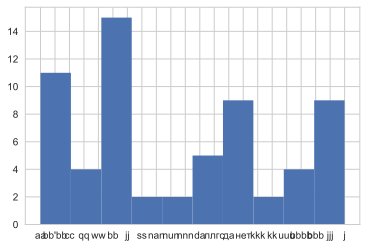

In [115]:
res = word_count("aa bb'bb, cc cc cc. aa qq! ww ww ww aa bb bb, cc cc cc. aa jj jj ss nan nun nnn da ,,,,, ллгс ллгс ллгс ллгс да да да нет нет нет kkk kk нет нет нет uuu jj bbbb bbbb bbb bbbb jj jj jj jj jj jjj jj j j j j jj j jj j jj j jj ")

In [66]:
# Это магия для ввода текста, не трогайте её
# Выполните эту ячейку и увидите поле для ввода текста. 
# Введите текст, нажмите Enter и получите ответ, который вы вычислили в функции выше
from ipywidgets import widgets
text = widgets.Text(placeholder="тут текст")
display(text)
text.on_submit(lambda txt: word_count(txt.value))

Text(value='', placeholder='тут текст')

# Задание 2. Сумма цифр числа

Посчитать сумму цифр данного натурального числа. Например, `summa(1234) == 1+2+3+4 == 10`.

In [40]:
def summa(n):
    result = 0
    
    while n != 0:
        result += (n % 10)
        n = n // 10
    
    return result

print(summa(1234))

10


> Человеку свойственна итерация, рекурсия – удел богов. \(James O. Coplien, Bell Labs\)

In [42]:
def summa_recursive(n):
    result = (n % 10)
    sum_result = 0
    if n != 0: 
        sum_result = summa_recursive(n // 10)
    return result + sum_result

print(summa_recursive(1234))

10


# Задание 3 со звёздочкой. Множество

## Теория

Множество - это набор **различных** объектов. Это означает, что в нём нет повторяющихся объектов. `[1,2,3]` - множество, а `[1,2,2,3,1]` - не удовлетворяет определению.

Множество - это абстрактная структура данных и её можно реализовать несколькими способами. Но для начала определим поведения для этой абстракции.

#### Базовые операции:

Этот набор поведений определяет саму абстракцию.

- добавить элемент в множество
- объединить множества
- пересечь множества
- проверка принадлежности элемента множеству

#### Вспомогательные:

Это дополнительные функции. Они просто помогают пользоваться этой абстракцией.

- вычислить длину
- итерация по множеству
- создать множество из списка элементов
- сконвертировать множество в список

### Реализации

По определению, множество предоставляет только одну услугу - хранит только разные элементы. Порядок хранить оно не обязано, доступа по индексу тоже нет. Тогда на основе чего можно построить эту абстракцию?

#### Список

Мы можем создать множества на основе списка и просто проверять при каждой вставке в него то, есть ли в нём уже этот элемент или нет.

Преимущества:
- легко сделать

Недостатки:
- долгий поиск принадлежности и вставки O(n)
- очень долгое пересечение O(n^2)

#### Упорядоченный список

А что если хранить все элементы в списке упорядоченно? Тогда вставка будет занимать меньше времени в среднем: O(n/2). Но это тот же порядок.

#### Деревья поиска

Существует такая структура данных как дерево. Оно было создано специально для решения задачи поиска. В сбалансированном дереве поиск элемента имеет сложность O(log_2(n)), что очень хорошо. Сравните её с O(n):

![](https://habrastorage.org/getpro/habr/post_images/195/e1f/6a1/195e1f6a1379554ca9025338301a78ed.png)

__картинка взята из статьи [bigocheatsheet.com](http://bigocheatsheet.com/)__

Условия бинарного дерева поиска:

- Оба поддерева — левое и правое — являются двоичными деревьями поиска.
- У всех узлов левого поддерева произвольного узла X значения ключей данных меньше, нежели значение ключа данных самого узла X.
- У всех узлов правого поддерева произвольного узла X значения ключей данных больше либо равно, нежели значение ключа данных самого узла X.

Статья на [wiki](https://ru.wikipedia.org/wiki/%D0%94%D0%B2%D0%BE%D0%B8%D1%87%D0%BD%D0%BE%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA%D0%B0).

#### Хэш таблицы

Основная идея заключается в использовании некоторой хэш функции, которая возвращает некоторое число. Это число используется как индекс в массиве. Поэтому операция поиска принадлежности будет O(1). В случае коллизии хэш функции, то есть когда для разных элементов было вычислено одно и то же значение хэш функции, предусматривается некоторое специальное поведение. Например, можно по индексу хэш функции хранить не один элемент, а несколько. Если коллизий очень мало, то поиск принадлежности будет всё тот же O(1) + O(n), где n - количество элементов с одним хешем. Такой метод называется методом цепочек.

Статья на [wiki](https://ru.wikipedia.org/wiki/%D0%A5%D0%B5%D1%88-%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0)

## Практика

Можно сделать в функциональном, процедурном или ООП стиле.

### Множество на основе хеш-таблицы

Используйте массивы python как базовую структуру.
Реализуйте какую-нибудь функцию хеширования: например, остаток от деления на N или [mur-mur](https://ru.wikipedia.org/wiki/Murmur2). Для начала, чтобы тестировать свой код, можете использовать функцию `hash`.

Напишите бенчмарк(замер скорости выполнения) для базовых функций вашего множества.

### Множество на основе дерева

Реализуйте множество на основе бинарного дерева поиска. Если вам понадобится массив, то используйте только ваш список из предыдущей практики.

Напишите бенчмарк(замер скорости выполнения) для базовых функций вашего множества.

Сравните скорость работы каждой реализации множества.


In [3]:
# Ваш код здесь

In [4]:
# И здесь